In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse



mnist = fetch_mldata('MNIST original')
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)
train_image, test_image, train_label, test_label =train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
print(train_image.shape)
print(test_image.shape)
print(train_label.shape)
print(test_label.shape)#Showing the MNIST images and labels


(70000, 784)
(70000,)
(60000, 784)
(10000, 784)
(60000,)
(10000,)


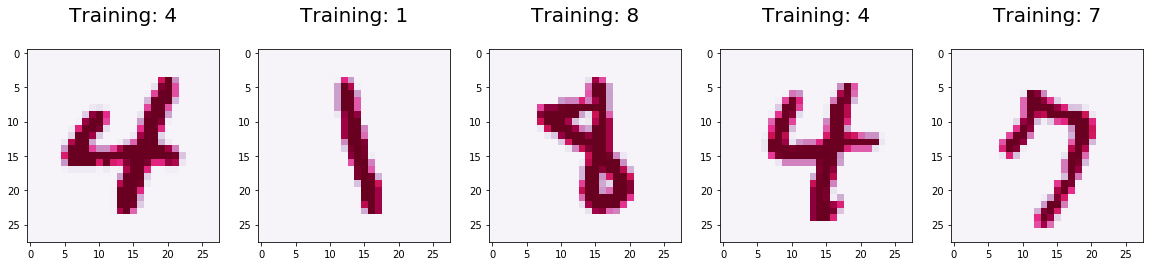

In [2]:

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_image[0:5], train_label[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.PuRd)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [3]:
#One hot vector:-  
#is a unidimensional array of labels into a one-hot varient, where the array is size m (examples) x n (classes)
#meaning one value corresponding to the correct label is set to 1 and the others are set to 0
def oneHot(label_data):
    m = label_data.shape[0]
    #label_data = label_data[:,0]
    oh_vec = scipy.sparse.csr_matrix((np.ones(m), (label_data, np.array(range(m)))))
    oh_vec = np.array(oh_vec.todense()).T
    return oh_vec
print("one hot vector:")
oneHot(train_label)


one hot vector:


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [39]:
#Softmax function as we need to classify input data to multiple classes
def softmax_reg(predicted_val):
    predicted_val -= np.max(predicted_val)
    probability = (np.exp(predicted_val).T/np.sum(np.exp(predicted_val),axis=1)).T
    print (probability)
    return probability


In [24]:
#Loss function where w is weight
def loss_regression(w,inp_data,out_data,lambda_val):
    num_train = inp_data.shape[0]
    hot_mat = oneHot(out_data)
    predicted_val = np.dot(inp_data,w)
    
    
    loss = (-1 ) * np.sum(hot_mat * np.log(prob))/ 60000 + (lambda_val/2)*np.sum(w*w) 
    gradient = ((-1) * np.dot(inp_data.T,(hot_mat - prob)))/ 60000 + lambda_val*w
    return loss,gradient


In [10]:
#We define a function to find the probability and prediction for each class of given input data
def probab_predict(input_data):
    probab = softmax(np.dot(input_data,w))
    predict = np.argmax(probab,axis=1)
    return probab,predict

In [25]:
#We initialize our weights, regularization factor, number of iterations, and learning rate.
#Then loop over a computation of the loss and gradient, and application of gradient.
w = np.zeros([train_image.shape[1],len(np.unique(train_label))])
num_iter = 100
lambda_val = 1
learning_rate = 1e-5
loss_vec = []
for i in range(0,num_iter):
    loss,gradient = loss_regression(w,train_image,train_label,lambda_val)
    print('loss is:', loss,'gradient size is:', gradient.shape)
    loss_vec.append(loss)
    w = w - (learning_rate * gradient)
print (loss)



loss is: 2.30258509299 gradient size is: (784, 10)
loss is: 1.71700572399 gradient size is: (784, 10)
loss is: 1.38614369729 gradient size is: (784, 10)
loss is: 1.19310956628 gradient size is: (784, 10)
loss is: 1.09062047027 gradient size is: (784, 10)
loss is: 0.996340811914 gradient size is: (784, 10)
loss is: 0.974891709051 gradient size is: (784, 10)
loss is: 0.843000843773 gradient size is: (784, 10)
loss is: 0.819722321484 gradient size is: (784, 10)
loss is: 0.764982020146 gradient size is: (784, 10)
loss is: 0.752709003104 gradient size is: (784, 10)
loss is: 0.701771910886 gradient size is: (784, 10)
loss is: 0.685207858154 gradient size is: (784, 10)
loss is: 0.652084398759 gradient size is: (784, 10)
loss is: 0.634933885159 gradient size is: (784, 10)
loss is: 0.612606216574 gradient size is: (784, 10)
loss is: 0.597521941272 gradient size is: (784, 10)
loss is: 0.582100325506 gradient size is: (784, 10)
loss is: 0.570003185121 gradient size is: (784, 10)
loss is: 0.558822

KeyboardInterrupt: 

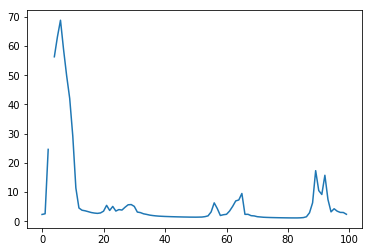

In [7]:
plt.plot(loss_vec)

In [8]:
loss

2.3672110908943353

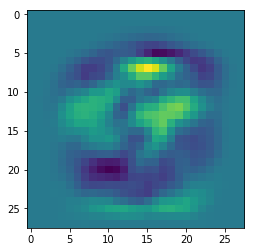

In [10]:
plt.imshow(scipy.reshape(w[:,9],[28,28]))

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Extract feature values and labels from the data
mnist_train_labels = np.array(mnist.train.labels)
mnist_train_images =  np.array(mnist.train.images)
mnist_valid_images =  np.array(mnist.validation.images)
mnist_valid_labels =  np.array(mnist.validation.labels)
mnist_test_labels =  np.array(mnist.test.labels)
mnist_test_images =  np.array(mnist.test.images) 
x = mnist_train_images
y = mnist_train_labels
w = np.zeros([x.shape[1], 10])

ModuleNotFoundError: No module named 'tensorflow'

In [61]:
#We initialize our weights, regularization factor, number of iterations, and learning rate.
#Then loop over a computation of the loss and gradient, and application of gradient.
# w = np.zeros([train_image.shape[1],len(np.unique(train_label))])
train_image = x 
train_label = y 
num_iter = 1000
lambda_val = 1
learning_rate = 0.0001
loss_vec = []
for i in range(0,num_iter):
    loss,gradient = loss_regression(w,train_image,train_label,lambda_val)
    print('loss is:', loss,'gradient size is:', gradient.shape)
    loss_vec.append(loss)
    w = w - (learning_rate * gradient)
print (loss)



('loss is:', 4.7937358303095348, 'gradient size is:', (784, 10))
('loss is:', 4.7930166994115453, 'gradient size is:', (784, 10))
('loss is:', 4.792297710751618, 'gradient size is:', (784, 10))
('loss is:', 4.7915788642145003, 'gradient size is:', (784, 10))
('loss is:', 4.7908601596851144, 'gradient size is:', (784, 10))
('loss is:', 4.7901415970485699, 'gradient size is:', (784, 10))
('loss is:', 4.7894231761901604, 'gradient size is:', (784, 10))
('loss is:', 4.7887048969953598, 'gradient size is:', (784, 10))
('loss is:', 4.7879867593498231, 'gradient size is:', (784, 10))
('loss is:', 4.78726876313939, 'gradient size is:', (784, 10))
('loss is:', 4.7865509082500735, 'gradient size is:', (784, 10))
('loss is:', 4.7858331945680801, 'gradient size is:', (784, 10))
('loss is:', 4.7851156219797835, 'gradient size is:', (784, 10))
('loss is:', 4.7843981903717472, 'gradient size is:', (784, 10))
('loss is:', 4.7836808996307116, 'gradient size is:', (784, 10))
('loss is:', 4.7829637496435

('loss is:', 4.7035076437066978, 'gradient size is:', (784, 10))
('loss is:', 4.702805712774329, 'gradient size is:', (784, 10))
('loss is:', 4.7021039108072866, 'gradient size is:', (784, 10))
('loss is:', 4.7014022377112132, 'gradient size is:', (784, 10))
('loss is:', 4.7007006933918918, 'gradient size is:', (784, 10))
('loss is:', 4.6999992777552633, 'gradient size is:', (784, 10))
('loss is:', 4.6992979907074037, 'gradient size is:', (784, 10))
('loss is:', 4.6985968321545419, 'gradient size is:', (784, 10))
('loss is:', 4.6978958020030532, 'gradient size is:', (784, 10))
('loss is:', 4.6971949001594533, 'gradient size is:', (784, 10))
('loss is:', 4.6964941265304141, 'gradient size is:', (784, 10))
('loss is:', 4.6957934810227391, 'gradient size is:', (784, 10))
('loss is:', 4.695092963543388, 'gradient size is:', (784, 10))
('loss is:', 4.694392573999461, 'gradient size is:', (784, 10))
('loss is:', 4.6936923122981957, 'gradient size is:', (784, 10))
('loss is:', 4.6929921783469

('loss is:', 4.615364268602395, 'gradient size is:', (784, 10))
('loss is:', 4.6146780078568783, 'gradient size is:', (784, 10))
('loss is:', 4.6139918651908722, 'gradient size is:', (784, 10))
('loss is:', 4.6133058405268352, 'gradient size is:', (784, 10))
('loss is:', 4.6126199337873395, 'gradient size is:', (784, 10))
('loss is:', 4.6119341448950832, 'gradient size is:', (784, 10))
('loss is:', 4.6112484737728776, 'gradient size is:', (784, 10))
('loss is:', 4.6105629203436553, 'gradient size is:', (784, 10))
('loss is:', 4.6098774845304673, 'gradient size is:', (784, 10))
('loss is:', 4.6091921662564772, 'gradient size is:', (784, 10))
('loss is:', 4.6085069654449669, 'gradient size is:', (784, 10))
('loss is:', 4.6078218820193415, 'gradient size is:', (784, 10))
('loss is:', 4.6071369159031228, 'gradient size is:', (784, 10))
('loss is:', 4.6064520670199389, 'gradient size is:', (784, 10))
('loss is:', 4.6057673352935451, 'gradient size is:', (784, 10))
('loss is:', 4.60508272064

('loss is:', 4.5291292343638503, 'gradient size is:', (784, 10))
('loss is:', 4.5284573868703779, 'gradient size is:', (784, 10))
('loss is:', 4.5277856484946479, 'gradient size is:', (784, 10))
('loss is:', 4.5271140191727035, 'gradient size is:', (784, 10))
('loss is:', 4.5264424988406873, 'gradient size is:', (784, 10))
('loss is:', 4.5257710874348183, 'gradient size is:', (784, 10))
('loss is:', 4.5250997848914336, 'gradient size is:', (784, 10))
('loss is:', 4.5244285911469513, 'gradient size is:', (784, 10))
('loss is:', 4.5237575061378923, 'gradient size is:', (784, 10))
('loss is:', 4.5230865298008718, 'gradient size is:', (784, 10))
('loss is:', 4.5224156620725946, 'gradient size is:', (784, 10))
('loss is:', 4.521744902889866, 'gradient size is:', (784, 10))
('loss is:', 4.5210742521895861, 'gradient size is:', (784, 10))
('loss is:', 4.5204037099087451, 'gradient size is:', (784, 10))
('loss is:', 4.5197332759844313, 'gradient size is:', (784, 10))
('loss is:', 4.51906295035

('loss is:', 4.4446572843547498, 'gradient size is:', (784, 10))
('loss is:', 4.443998813507366, 'gradient size is:', (784, 10))
('loss is:', 4.4433404443729376, 'gradient size is:', (784, 10))
('loss is:', 4.4426821768985194, 'gradient size is:', (784, 10))
('loss is:', 4.4420240110312479, 'gradient size is:', (784, 10))
('loss is:', 4.4413659467183351, 'gradient size is:', (784, 10))
('loss is:', 4.4407079839070711, 'gradient size is:', (784, 10))
('loss is:', 4.4400501225448226, 'gradient size is:', (784, 10))
('loss is:', 4.439392362579035, 'gradient size is:', (784, 10))
('loss is:', 4.4387347039572322, 'gradient size is:', (784, 10))
('loss is:', 4.4380771466270108, 'gradient size is:', (784, 10))
('loss is:', 4.437419690536049, 'gradient size is:', (784, 10))
('loss is:', 4.4367623356321024, 'gradient size is:', (784, 10))
('loss is:', 4.436105081863003, 'gradient size is:', (784, 10))
('loss is:', 4.4354479291766573, 'gradient size is:', (784, 10))
('loss is:', 4.43479087752104

('loss is:', 4.3618284178027675, 'gradient size is:', (784, 10))
('loss is:', 4.3611824656763316, 'gradient size is:', (784, 10))
('loss is:', 4.3605366091238968, 'gradient size is:', (784, 10))
('loss is:', 4.3598908481015037, 'gradient size is:', (784, 10))
('loss is:', 4.359245182565247, 'gradient size is:', (784, 10))
('loss is:', 4.3585996124712958, 'gradient size is:', (784, 10))
('loss is:', 4.357954137775879, 'gradient size is:', (784, 10))
('loss is:', 4.3573087584352832, 'gradient size is:', (784, 10))
('loss is:', 4.3566634744058677, 'gradient size is:', (784, 10))
('loss is:', 4.3560182856440512, 'gradient size is:', (784, 10))
('loss is:', 4.3553731921063097, 'gradient size is:', (784, 10))
('loss is:', 4.3547281937491942, 'gradient size is:', (784, 10))
('loss is:', 4.3540832905293101, 'gradient size is:', (784, 10))
('loss is:', 4.3534384824033268, 'gradient size is:', (784, 10))
('loss is:', 4.352793769327981, 'gradient size is:', (784, 10))
('loss is:', 4.3521491512600

('loss is:', 4.2805431642814193, 'gradient size is:', (784, 10))
('loss is:', 4.2799090185956894, 'gradient size is:', (784, 10))
('loss is:', 4.2792749633798666, 'gradient size is:', (784, 10))
('loss is:', 4.2786409985973561, 'gradient size is:', (784, 10))
('loss is:', 4.278007124211606, 'gradient size is:', (784, 10))
('loss is:', 4.2773733401861289, 'gradient size is:', (784, 10))
('loss is:', 4.2767396464844856, 'gradient size is:', (784, 10))
('loss is:', 4.2761060430702837, 'gradient size is:', (784, 10))
('loss is:', 4.2754725299071898, 'gradient size is:', (784, 10))
('loss is:', 4.2748391069589244, 'gradient size is:', (784, 10))
('loss is:', 4.2742057741892499, 'gradient size is:', (784, 10))
('loss is:', 4.2735725315619879, 'gradient size is:', (784, 10))
('loss is:', 4.2729393790410146, 'gradient size is:', (784, 10))
('loss is:', 4.2723063165902504, 'gradient size is:', (784, 10))
('loss is:', 4.2716733441736716, 'gradient size is:', (784, 10))
('loss is:', 4.27104046175

('loss is:', 4.2007188346524229, 'gradient size is:', (784, 10))
('loss is:', 4.2000959025562281, 'gradient size is:', (784, 10))
('loss is:', 4.1994730566773502, 'gradient size is:', (784, 10))
('loss is:', 4.1988502969852837, 'gradient size is:', (784, 10))
('loss is:', 4.1982276234495552, 'gradient size is:', (784, 10))
('loss is:', 4.1976050360397368, 'gradient size is:', (784, 10))
('loss is:', 4.1969825347254446, 'gradient size is:', (784, 10))
('loss is:', 4.1963601194763376, 'gradient size is:', (784, 10))
('loss is:', 4.1957377902621174, 'gradient size is:', (784, 10))
('loss is:', 4.1951155470525361, 'gradient size is:', (784, 10))
('loss is:', 4.1944933898173753, 'gradient size is:', (784, 10))
('loss is:', 4.1938713185264707, 'gradient size is:', (784, 10))
('loss is:', 4.1932493331496987, 'gradient size is:', (784, 10))
('loss is:', 4.1926274336569733, 'gradient size is:', (784, 10))
('loss is:', 4.1920056200182598, 'gradient size is:', (784, 10))
('loss is:', 4.1913838922

In [46]:
w = np.zeros([train_image.shape[1],len(np.unique(train_label))])
loss,gradient = loss_regression(w,train_image,train_label,lambda_val)

[[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]


In [47]:
loss

2.3025850929940446

In [41]:
w = w - (learning_rate * gradient)
w

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [42]:
loss,gradient = loss_regression(w,train_image,train_label,lambda_val)

[[ 0.10567984  0.03490392  0.08713352 ...,  0.10516264  0.11148246
   0.15482513]
 [ 0.07785556  0.11016004  0.09508927 ...,  0.0834604   0.13810142
   0.10008784]
 [ 0.09146899  0.05363733  0.08850501 ...,  0.10464151  0.14334878
   0.12184683]
 ..., 
 [ 0.11732276  0.02980034  0.05248771 ...,  0.15937935  0.1017888
   0.17537462]
 [ 0.08771887  0.11885123  0.09784286 ...,  0.13509333  0.12980238
   0.10890025]
 [ 0.09601497  0.04224214  0.10158053 ...,  0.07655416  0.22275562
   0.08512882]]


In [43]:
loss

1.7170057239870222

In [44]:
loss,gradient = loss_regression(w,train_image,train_label,lambda_val)

[[ 0.10567984  0.03490392  0.08713352 ...,  0.10516264  0.11148246
   0.15482513]
 [ 0.07785556  0.11016004  0.09508927 ...,  0.0834604   0.13810142
   0.10008784]
 [ 0.09146899  0.05363733  0.08850501 ...,  0.10464151  0.14334878
   0.12184683]
 ..., 
 [ 0.11732276  0.02980034  0.05248771 ...,  0.15937935  0.1017888
   0.17537462]
 [ 0.08771887  0.11885123  0.09784286 ...,  0.13509333  0.12980238
   0.10890025]
 [ 0.09601497  0.04224214  0.10158053 ...,  0.07655416  0.22275562
   0.08512882]]


In [45]:
loss

1.7170057239870222

In [84]:
# np.fromstring(train_image.tostring(), dtype='<f4')
w = np.zeros([train_image.shape[1],len(np.unique(train_label))])
predicted_val = np.dot(train_image,w)
prob = softmax_reg(predicted_val)

[[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]


In [76]:
hot_mat = oneHot(train_label)
loss = (-1 ) * np.sum(hot_mat * np.log(prob))/ 60000 + (lambda_val/2)*np.sum(w*w)


In [77]:
loss

2.3025850929940446

In [78]:
gradient = ((-1) * np.dot(train_image.T,(hot_mat - prob)))/ 60000 + lambda_val*w
gradient

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [85]:
w = w - (learning_rate * gradient)

In [86]:
w

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [81]:
predicted_val = np.dot(train_image,w)
predicted_val

array([[ 0.15761284, -0.95020212, -0.03535968, ...,  0.15270686,
         0.21106601,  0.53949502],
       [-0.23242002,  0.1146588 , -0.03245923, ..., -0.16290314,
         0.34071293,  0.01877285],
       [-0.0440909 , -0.57784568, -0.07703166, ...,  0.09044944,
         0.4051898 ,  0.24267385],
       ..., 
       [ 0.27317612, -1.09723271, -0.53117357, ...,  0.57953458,
         0.13114745,  0.67517174],
       [-0.10788095,  0.19585456,  0.0013447 , ...,  0.32394786,
         0.28399515,  0.10841431],
       [ 0.07240676, -0.74867902,  0.12875453, ..., -0.15409886,
         0.91397794, -0.04793173]])

In [87]:
for i in range(w.shape[0]):
    for ss in range(w.shape[1]):
        if w[i][ss] != 0.0:
            print(w[i][ss])
            

-2.1e-09
-2.1e-09
-4.33333333333e-10
-2.1e-09
-2.1e-09
-2.1e-09
1.72333333333e-08
-2.1e-09
-2.1e-09
-2.1e-09
-7.83333333333e-09
-7.83333333333e-09
2.81666666667e-08
-7.83333333333e-09
-7.83333333333e-09
-7.83333333333e-09
3.45e-08
-7.83333333333e-09
-7.83333333333e-09
-7.83333333333e-09
-3.6e-09
-3.6e-09
3.24e-08
-3.6e-09
-3.6e-09
-3.6e-09
-3.6e-09
-3.6e-09
-3.6e-09
-3.6e-09
-1.5e-10
-1.5e-10
1.35e-09
-1.5e-10
-1.5e-10
-1.5e-10
-1.5e-10
-1.5e-10
-1.5e-10
-1.5e-10
-2.66666666667e-10
-2.66666666667e-10
-2.66666666667e-10
-2.66666666667e-10
-2.66666666667e-10
-2.66666666667e-10
2.4e-09
-2.66666666667e-10
-2.66666666667e-10
-2.66666666667e-10
-1.41666666667e-09
-1.41666666667e-09
4.91666666667e-09
-1.41666666667e-09
-1.41666666667e-09
-1.41666666667e-09
6.41666666667e-09
-1.41666666667e-09
-1.41666666667e-09
-1.41666666667e-09
-1.06e-08
-1.06e-08
2.87333333333e-08
-1.06e-08
-1.06e-08
-1.06e-08
5.60666666667e-08
-1.06e-08
-1.06e-08
-1.06e-08
-2.34166666667e-08
-2.34166666667e-08
5.583333333

-4.83333333333e-07
-4.78e-07
-1.65841666667e-06
-1.69808333333e-06
-1.23758333333e-06
8.0575e-07
-1.14008333333e-06
-1.70525e-06
-1.69891666667e-06
1.133475e-05
-1.41158333333e-06
-1.59058333333e-06
-3.8859e-06
-4.33123333333e-06
-1.4969e-06
3.2251e-06
-1.43923333333e-06
-4.0609e-06
-4.20623333333e-06
2.22317666667e-05
-2.4499e-06
-3.58656666667e-06
-6.38321666667e-06
-9.64771666667e-06
9.495e-08
4.39778333333e-06
-1.39755e-06
-7.09171666667e-06
-8.19121666667e-06
3.78081166667e-05
-3.53205e-06
-6.05738333333e-06
-5.3595e-06
-1.92485e-05
1.516e-06
3.366e-06
-9.19833333333e-07
-1.01488333333e-05
-1.26593333333e-05
5.45796666667e-05
-3.46733333333e-06
-7.65833333333e-06
2.3378e-06
-3.41303666667e-05
-2.09936666667e-06
-4.11736666667e-06
2.4863e-06
-1.12425333333e-05
-1.71028666667e-05
7.09008e-05
-9.132e-07
-6.1192e-06
1.48205166667e-05
-5.46299833333e-05
-1.275265e-05
-1.89833166667e-05
7.55051666667e-06
-8.67948333333e-06
-2.07209833333e-05
8.110885e-05
7.42468333333e-06
4.86185e-06
3.

-4.3417e-05
1.44268333333e-05
9.678795e-05
-7.10032166667e-05
-1.56513833333e-05
-4.85257166667e-05
9.49257833333e-05
-2.783805e-05
4.08662833333e-05
-5.20467166667e-05
-5.21883833333e-05
3.467345e-05
5.12146333333e-05
-8.44615333333e-05
-1.21705333333e-05
-4.10588666667e-05
9.76814666667e-05
-1.84177e-05
6.96704666667e-05
-6.72978666667e-05
-4.33282e-05
4.81681333333e-05
-7.349e-06
-8.63221666667e-05
9.30833333333e-07
-2.1769e-05
8.69203333333e-05
-7.55716666667e-06
7.03838333333e-05
-7.50745e-05
-9.923e-06
4.97598333333e-05
-5.75694166667e-05
-6.77405833333e-05
1.71949166667e-05
-5.81941666667e-06
7.22785833333e-05
-6.20675e-06
4.044825e-05
-7.898425e-05
4.081975e-05
4.55789166667e-05
-9.23897666667e-05
4.46256666667e-06
2.57957333333e-05
-7.79293333333e-06
5.41072333333e-05
-1.75979333333e-05
6.32323333333e-06
-8.84359333333e-05
7.97990666667e-05
3.57287333333e-05
-0.00011893255
0.000113067783333
2.52802833333e-05
-2.45988833333e-05
3.62592833333e-05
-3.66337166667e-05
-2.2512166666

2.381065e-05
5.72464833333e-05
-1.55056833333e-05
1.617415e-05
-7.17351666667e-06
-4.65011833333e-05
1.191565e-05
-2.01210166667e-05
2.56298666667e-05
-4.22914666667e-05
4.22477e-05
3.81270333333e-05
-1.32796333333e-05
1.22637e-05
-1.29849666667e-05
-3.71188e-05
5.5362e-06
-1.81296333333e-05
1.23871333333e-05
-2.65572e-05
4.90263e-05
2.00036333333e-05
-1.08782e-05
7.2708e-06
-1.33492e-05
-2.50895333333e-05
1.27563333333e-06
-1.40893666667e-05
2.62623333333e-06
-1.52444333333e-05
4.64947333333e-05
6.86206666667e-06
-7.50943333333e-06
3.12573333333e-06
-1.00727666667e-05
-1.50614333333e-05
-1.60793333333e-06
-9.61276666667e-06
-2.16655e-06
-8.08405e-06
3.651195e-05
-8.72883333333e-07
-4.31605e-06
1.95616666667e-07
-6.34421666667e-06
-7.97021666667e-06
-1.53771666667e-06
-5.41588333333e-06
-2.50003333333e-06
-3.87686666667e-06
2.46024666667e-05
-2.7447e-06
-2.47003333333e-06
-1.16336666667e-06
-3.38686666667e-06
-3.95353333333e-06
-1.8202e-06
-2.68686666667e-06
-1.44906666667e-06
-1.56323